In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

In [2]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 10.892s
Test R2 score: 0.81


Computing partial dependence plots...
done in 38.031s


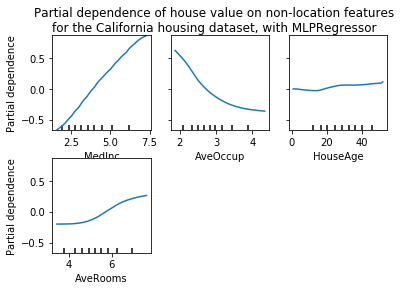

In [3]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
tic = time()
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']
display = plot_partial_dependence( est, X_train, features)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with MLPRegressor'
)
display.figure_.subplots_adjust(hspace=0.3)

In [4]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.923s
Test R2 score: 0.85


Computing partial dependence plots...
done in 0.168s


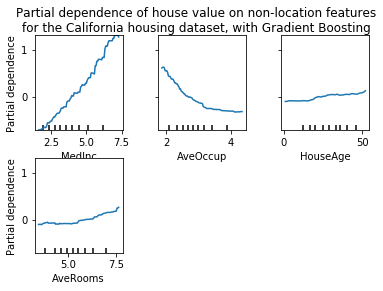

In [5]:
print('Computing partial dependence plots...')
tic = time()
display = plot_partial_dependence(
    est, X_train, features
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with Gradient Boosting'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

Computing partial dependence plots...
done in 0.317s


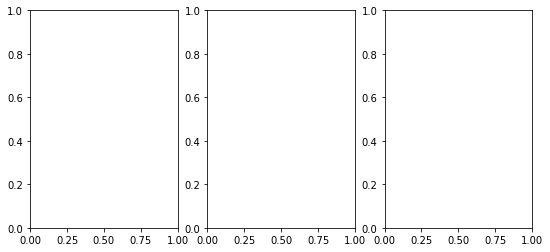

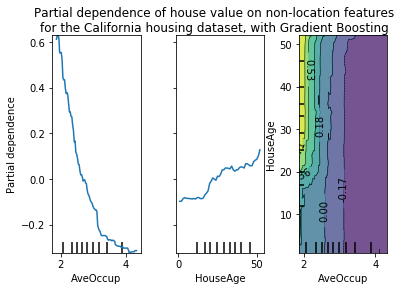

In [6]:
features = ['AveOccup', 'HouseAge', ('AveOccup', 'HouseAge')]
print('Computing partial dependence plots...')
tic = time()
_, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = plot_partial_dependence(
    est, X_train, features, 
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with Gradient Boosting'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)